In [71]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [72]:
from sklearn.datasets import load_iris
iris= load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [73]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [74]:
iris.data.shape

(150, 4)

In [75]:
iris.target.shape

(150,)

In [76]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression ##Logistic regression 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [78]:
xtrain,xtest,ytrain,ytest =train_test_split(iris.data,iris.target,test_size=0.20,random_state=2)

In [79]:
print('\n xtrain:',xtrain.shape)
print('\n xtest:',xtest.shape)
print('\n ytrain:',ytrain.shape)
print('\n ytest:',ytest.shape)


 xtrain: (120, 4)

 xtest: (30, 4)

 ytrain: (120,)

 ytest: (30,)


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [81]:
scaled_Xtrain=scaler.fit_transform(xtrain)
scaled_Xtest=scaler.fit_transform(xtest)

In [82]:
##Logistic Regression 
log_reg= LogisticRegression()
log_reg.fit(scaled_Xtrain,ytrain)

LogisticRegression()

In [83]:
ypred=log_reg.predict(scaled_Xtest)
ypred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [84]:
df_predicted=pd.DataFrame()
df_predicted['Actual']=ytest
df_predicted['Predicted']=ypred
df_predicted.head()

,Actual,Predicted
0,0,0
1,0,0
2,2,2
3,0,0
4,0,0


In [85]:
matrix= confusion_matrix(ytest,ypred)
matrix

array([[13,  1,  0],
       [ 0,  5,  3],
       [ 0,  0,  8]], dtype=int64)

In [86]:
print('Accuracy:',accuracy_score(ytest,ypred)*100)

Accuracy: 86.66666666666667


In [87]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(scaled_Xtrain,ytrain)

KNeighborsClassifier()

In [88]:
ypred1=classifier.predict(scaled_Xtest)

In [89]:
ypred1

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [90]:
matrix1=confusion_matrix(ytest,ypred1)
matrix1

array([[13,  1,  0],
       [ 0,  6,  2],
       [ 0,  0,  8]], dtype=int64)

Text(69.0, 0.5, 'Predicted values')

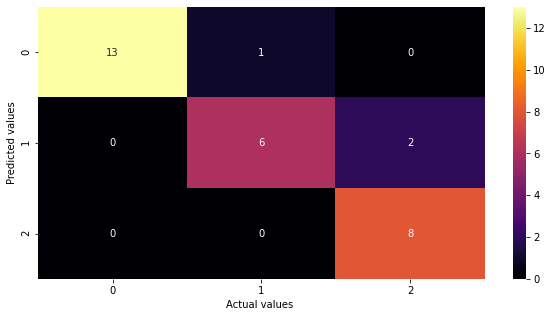

In [116]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix1,annot=True,cmap="inferno")
plt.xlabel('Actual values ')
plt.ylabel('Predicted values')

In [91]:
print('Accuracy:',accuracy_score(ytest,ypred1)*100)

Accuracy: 90.0


In [92]:
print('\nclassification_report:\n',classification_report(ytest,ypred1))


classification_report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.86      0.75      0.80         8
           2       0.80      1.00      0.89         8

    accuracy                           0.90        30
   macro avg       0.89      0.89      0.88        30
weighted avg       0.91      0.90      0.90        30

